In [35]:
import numpy as np
import matplotlib.pyplot as plt


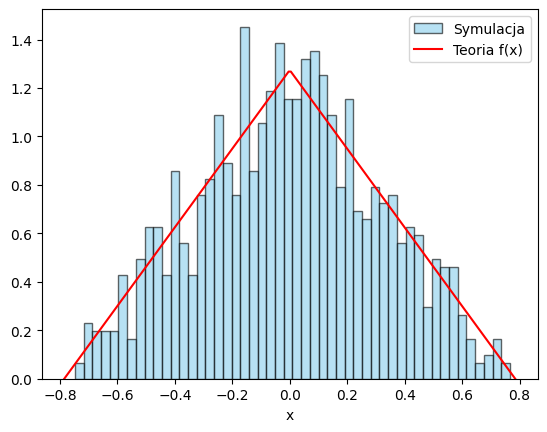

In [36]:
#generujemy losowe wartości dla szumu
n = 1000
U = np.random.rand(n)

X = np.where(U < 0.5,
             -1 + np.sqrt(2 * U),
             1 - np.sqrt(2 * (1 - U)))

desired_var = 0.1 # wariancja
current_var = np.var(X)
scale_factor = np.sqrt(desired_var / current_var)
#scale_factor = 1
noise = X * scale_factor
#noise = X
plt.hist(noise, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Symulacja')

x_vals = np.linspace(-1, 1, 200) * scale_factor
f = np.where(x_vals < 0, x_vals / scale_factor + 1, 1 - x_vals / scale_factor) / scale_factor
plt.plot(x_vals, f, 'r-', label='Teoria f(x)')

plt.xlabel('x')
plt.legend()
plt.show()


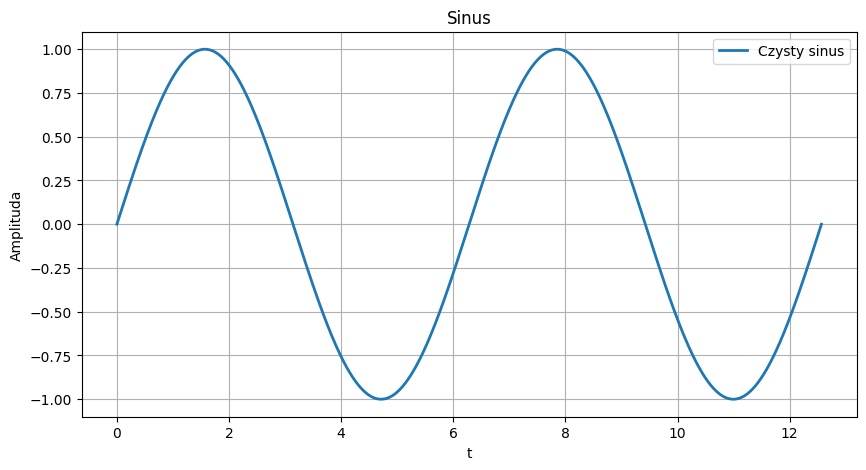

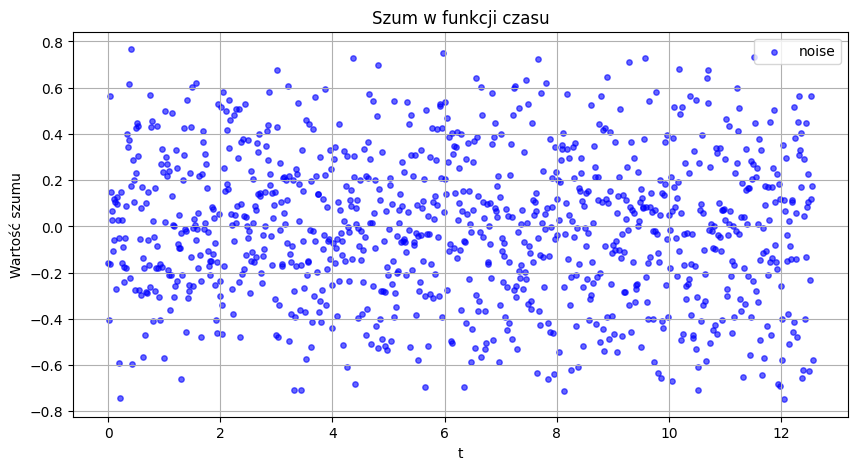

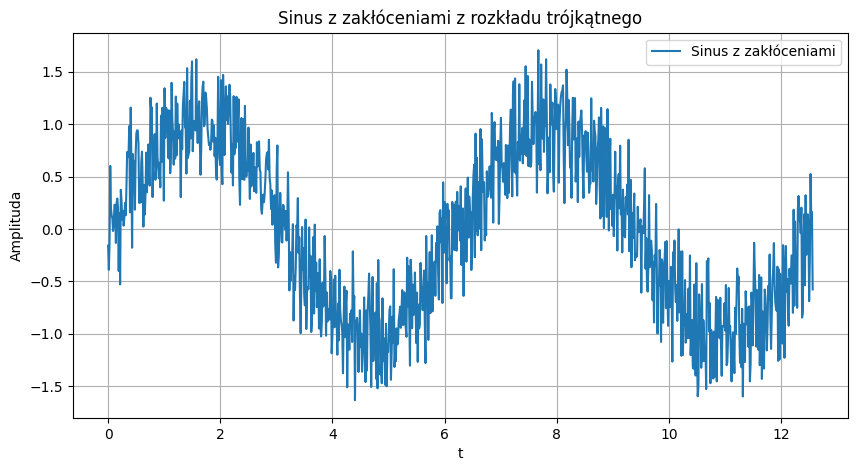

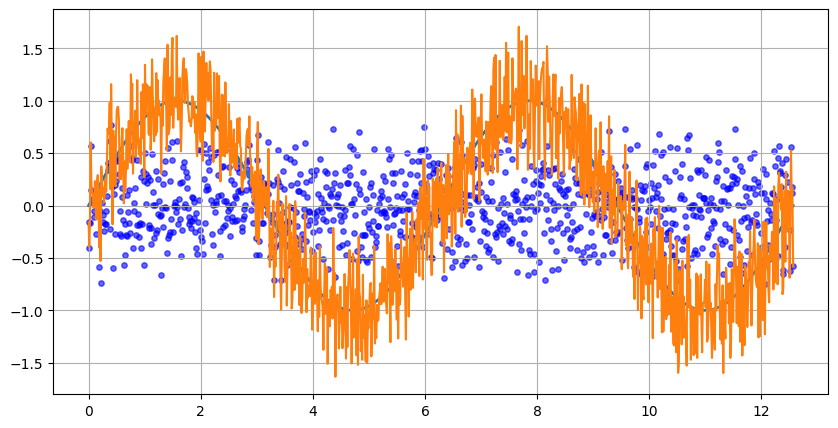

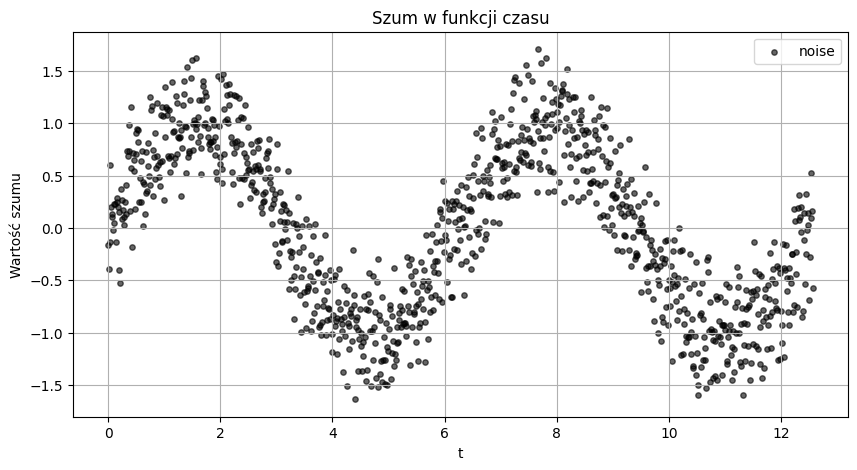

In [37]:

# --- Parametry ---
A = 1        
f = 1        
t = np.linspace(0, 4 * np.pi, n) 

y_clean = A * np.sin(t) 
y_noisy = y_clean + noise

# --- Rysowanie ---
plt.figure(figsize=(10, 5))
plt.plot(t, y_clean, label='Czysty sinus', linewidth=2)
plt.title('Sinus')
plt.xlabel('t')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 5))
plt.scatter(t, noise, color='blue', s=15, alpha=0.6, label='noise')
plt.title('Szum w funkcji czasu')
plt.xlabel('t')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(t, y_noisy, label='Sinus z zakłóceniami')
plt.title('Sinus z zakłóceniami z rozkładu trójkątnego')
plt.xlabel('t')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, y_clean, label='Czysty sinus', linewidth=2)
plt.scatter(t, noise, color='blue', s=15, alpha=0.6, label='noise')
plt.plot(t, y_noisy, label='Sinus z zakłóceniami')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(t, y_noisy, color='black', s=15, alpha=0.6, label='noise')
plt.title('Szum w funkcji czasu')
plt.xlabel('t')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()

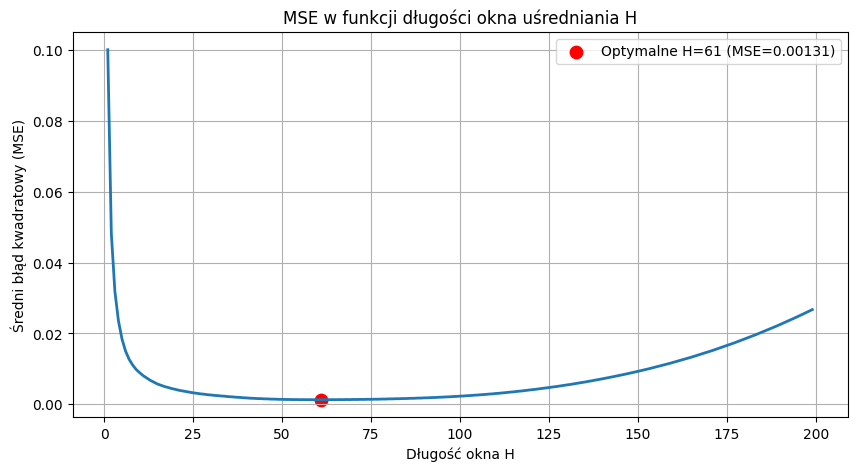

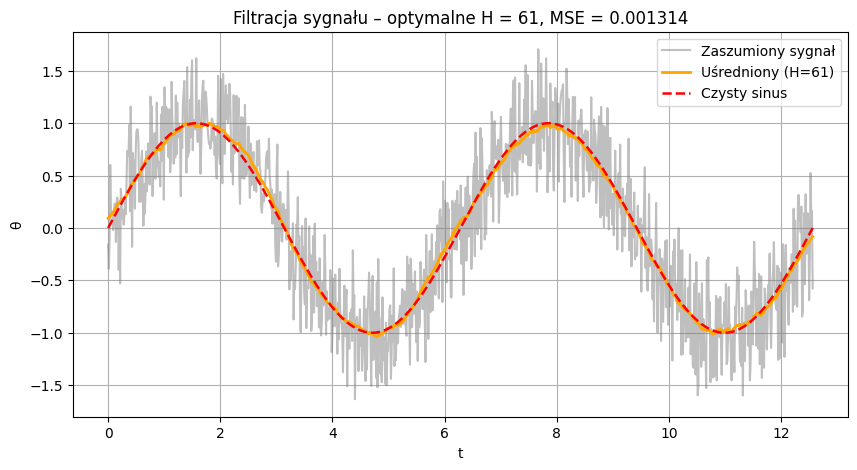

Optymalne H = 61, minimalne MSE = 0.001314


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# --- Filtracja przez uśrednianie ruchome ---
def moving_average_fast(theta, H):
    return np.convolve(theta, np.ones(H) / H, mode='same')

# --- Zakres H (liniowy) ---
H_values = np.arange(1, 200)  # od 1 do 200 włącznie
mse_values = []

# --- Liczenie MSE dla każdego H ---
for H in H_values:
    theta_hat = moving_average_fast(y_noisy, H)
    mse = np.mean((theta_hat - y_clean) ** 2)
    mse_values.append(mse)

mse_values = np.array(mse_values)
best_H = H_values[np.argmin(mse_values)]
best_mse = np.min(mse_values)

# --- Wykres MSE w funkcji H ---
plt.figure(figsize=(10, 5))
plt.plot(H_values, mse_values, '-', linewidth=2)
plt.scatter(best_H, best_mse, color='red', s=80, label=f'Optymalne H={best_H} (MSE={best_mse:.5f})')
plt.xlabel('Długość okna H')
plt.ylabel('Średni błąd kwadratowy (MSE)')
plt.title('MSE w funkcji długości okna uśredniania H')
plt.legend()
plt.grid(True)
plt.show()

# --- Wykres porównawczy dla najlepszego H ---
theta_hat_best = moving_average_fast(y_noisy, best_H)

plt.figure(figsize=(10,5))
plt.plot(t, y_noisy, color='gray', alpha=0.5, label='Zaszumiony sygnał')
plt.plot(t, theta_hat_best, color='orange', linewidth=2, label=f'Uśredniony (H={best_H})')
plt.plot(t, y_clean, '--', color='red', linewidth=1.8, label='Czysty sinus')
plt.xlabel('t')
plt.ylabel('θ')
plt.legend()
plt.grid(True)
plt.title(f'Filtracja sygnału – optymalne H = {best_H}, MSE = {best_mse:.6f}')
plt.show()

print(f"Optymalne H = {best_H}, minimalne MSE = {best_mse:.6f}")



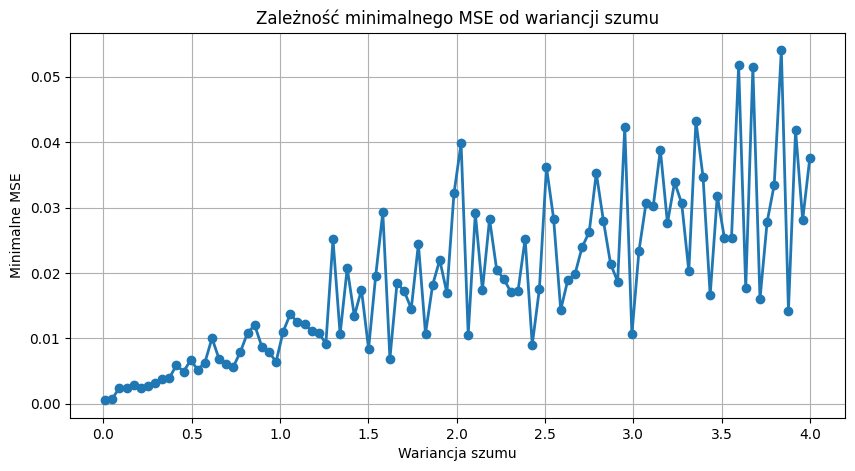

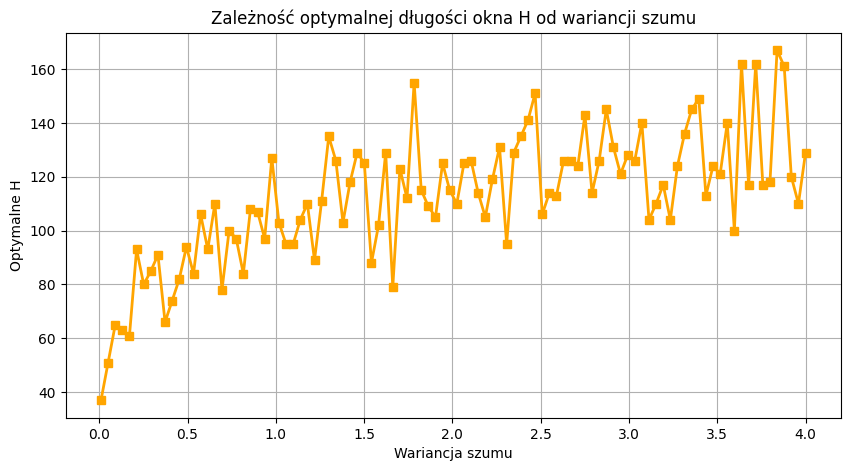

In [39]:
# --- Funkcja do generowania szumu o rozkładzie trójkątnym z daną wariancją ---
def generate_triangular_noise(n, desired_var):
    U = np.random.rand(n)
    X = np.where(U < 0.5, -1 + np.sqrt(2 * U), 1 - np.sqrt(2 * (1 - U)))
    current_var = np.var(X)
    scale_factor = np.sqrt(desired_var / current_var)
    return X * scale_factor

# --- Filtr uśredniający ---
def moving_average_fast(theta, H):
    return np.convolve(theta, np.ones(H) / H, mode='same')

# --- Parametry ---
n = 1000
t = np.linspace(0, 4 * np.pi, n)
A = 1
y_clean = A * np.sin(t)

# --- Wariancje szumu do testów ---
noise_variances = np.linspace(0.01, 4, 100)  # 10 wartości wariancji od 0.01 do 4

best_H_list = []
best_MSE_list = []

for desired_var in noise_variances:
    # Generacja szumu
    noise = generate_triangular_noise(n, desired_var)
    y_noisy = y_clean + noise

    # Zakres długości okna
    H_values = np.arange(1, 201)
    mse_values = []

    # Liczenie MSE dla każdego H
    for H in H_values:
        theta_hat = moving_average_fast(y_noisy, H)
        mse = np.mean((theta_hat - y_clean) ** 2)
        mse_values.append(mse)

    mse_values = np.array(mse_values)
    best_H = H_values[np.argmin(mse_values)]
    best_mse = np.min(mse_values)

    best_H_list.append(best_H)
    best_MSE_list.append(best_mse)

# --- Wykres: minimalne MSE w funkcji wariancji szumu ---
plt.figure(figsize=(10, 5))
plt.plot(noise_variances, best_MSE_list, 'o-', linewidth=2)
plt.xlabel('Wariancja szumu')
plt.ylabel('Minimalne MSE')
plt.title('Zależność minimalnego MSE od wariancji szumu')
plt.grid(True)
plt.show()

# --- Wykres: optymalne H w funkcji wariancji szumu ---
plt.figure(figsize=(10, 5))
plt.plot(noise_variances, best_H_list, 's-', color='orange', linewidth=2)
plt.xlabel('Wariancja szumu')
plt.ylabel('Optymalne H')
plt.title('Zależność optymalnej długości okna H od wariancji szumu')
plt.grid(True)
plt.show()